In [6]:
import pandas as pd 

import matplotlib as plot 

import pandas as pd 

import statsmodels.api as smapi

from statsmodels.tsa.arima.model import ARIMA

In [7]:
import pandas as pd 
data = pd.read_csv('D:\python projects\exchange\exchange.csv')
print(data)

            Date    Price     Open     High      Low    Vol. Change %
0     05/19/2023  22.0042  22.0143  22.0789  21.9445     NaN    0.03%
1     05/18/2023  21.9970  21.8130  22.0605  21.7650     NaN    0.93%
2     05/17/2023  21.7940  21.7770  21.9150  21.7235     NaN    0.10%
3     05/16/2023  21.7720  21.7090  21.8160  21.6780     NaN    0.38%
4     05/15/2023  21.6900  21.7270  21.7855  21.6340  11.13K    0.00%
...          ...      ...      ...      ...      ...     ...      ...
1139  01/07/2019  22.2670  22.4325  22.4500  22.2580   2.15K   -0.69%
1140  01/04/2019  22.4210  22.5180  22.5985  22.3815  49.54K   -0.43%
1141  01/03/2019  22.5180  22.7110  22.7875  22.4765   2.26K   -0.86%
1142  01/02/2019  22.7130  22.4430  22.7475  22.3820   2.33K    1.25%
1143  01/01/2019  22.4320  22.4200  22.4775  22.4200   1.62K    0.08%

[1144 rows x 7 columns]


In [8]:
data1 = data[['Date','Price']]
data1

,Date,Price
0,05/19/2023,22.0042
1,05/18/2023,21.9970
2,05/17/2023,21.7940
3,05/16/2023,21.7720
4,05/15/2023,21.6900
...,...,...
1139,01/07/2019,22.2670
1140,01/04/2019,22.4210
1141,01/03/2019,22.5180
1142,01/02/2019,22.7130


In [9]:
data2 = data1.sort_index(axis=0,ascending=False)
data2

,Date,Price
1143,01/01/2019,22.4320
1142,01/02/2019,22.7130
1141,01/03/2019,22.5180
1140,01/04/2019,22.4210
1139,01/07/2019,22.2670
...,...,...
4,05/15/2023,21.6900
3,05/16/2023,21.7720
2,05/17/2023,21.7940
1,05/18/2023,21.9970


In [10]:
def StartARIMAForecasting(Actual, p, d, q):
	model = ARIMA(Actual, order=(p, d, q))
	model_fit = model.fit()
	prediction = model_fit.forecast()[0]
	return prediction

In [11]:
ActualData = data2
ActualData

,Date,Price
1143,01/01/2019,22.4320
1142,01/02/2019,22.7130
1141,01/03/2019,22.5180
1140,01/04/2019,22.4210
1139,01/07/2019,22.2670
...,...,...
4,05/15/2023,21.6900
3,05/16/2023,21.7720
2,05/17/2023,21.7940
1,05/18/2023,21.9970


In [24]:
ActualData.iloc[1143:435]

,Date,Price


In [13]:
TrainingData = ActualData.iloc[:435]
TrainingData

,Date,Price
1143,01/01/2019,22.432
1142,01/02/2019,22.713
1141,01/03/2019,22.518
1140,01/04/2019,22.421
1139,01/07/2019,22.267
...,...,...
713,08/25/2020,22.099
712,08/26/2020,22.172
711,08/27/2020,22.204
710,08/28/2020,21.919


In [26]:
ActualData.iloc[435:]

,Date,Price
708,09/01/2020,22.0200
707,09/02/2020,22.1920
706,09/03/2020,22.2450
705,09/04/2020,22.3350
704,09/07/2020,22.3860
...,...,...
4,05/15/2023,21.6900
3,05/16/2023,21.7720
2,05/17/2023,21.7940
1,05/18/2023,21.9970


In [28]:
TestData = ActualData.iloc[435:]
TestData

,Date,Price
708,09/01/2020,22.0200
707,09/02/2020,22.1920
706,09/03/2020,22.2450
705,09/04/2020,22.3350
704,09/07/2020,22.3860
...,...,...
4,05/15/2023,21.6900
3,05/16/2023,21.7720
2,05/17/2023,21.7940
1,05/18/2023,21.9970


In [29]:
Actual = [[x for x in TrainingData]]
Predictions = []

In [30]:
for timepoint in TestData.index:
    ActualValue = TestData.loc[timepoint, "Price"]
    # forecast value
    Prediction = StartARIMAForecasting(TestData['Price'].values, 3, 1, 0)
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    # add it to the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

Actual=22.020000, Predicted=21.999967
Actual=22.192000, Predicted=21.999967
Actual=22.245000, Predicted=21.999967
Actual=22.335000, Predicted=21.999967
Actual=22.386000, Predicted=21.999967
Actual=22.493000, Predicted=21.999967
Actual=22.420000, Predicted=21.999967
Actual=22.495000, Predicted=21.999967
Actual=22.417000, Predicted=21.999967
Actual=22.469000, Predicted=21.999967
Actual=22.582000, Predicted=21.999967
Actual=22.583000, Predicted=21.999967
Actual=22.537000, Predicted=21.999967
Actual=22.564000, Predicted=21.999967
Actual=23.022000, Predicted=21.999967
Actual=22.971000, Predicted=21.999967
Actual=23.122000, Predicted=21.999967
Actual=23.222000, Predicted=21.999967
Actual=23.276000, Predicted=21.999967
Actual=23.308000, Predicted=21.999967
Actual=23.134000, Predicted=21.999967
Actual=23.078000, Predicted=21.999967
Actual=22.851000, Predicted=21.999967
Actual=23.134000, Predicted=21.999967
Actual=22.988000, Predicted=21.999967
Actual=23.041000, Predicted=21.999967
Actual=23.02

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
# Convert "Price" column to numeric
TestData['Price'] = pd.to_numeric(TestData['Price'], errors='coerce')

# Calculate mean squared error
Error = mean_squared_error(TestData['Price'], Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

Test Mean Squared Error (smaller the better fit): 1.323


C:\Users\SEMEN\AppData\Local\Temp\ipykernel_16548\2774767099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData['Price'] = pd.to_numeric(TestData['Price'], errors='coerce')


C:\Users\SEMEN\AppData\Local\Temp\ipykernel_16548\198092062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData["Date"] = pd.to_datetime(TestData["Date"])


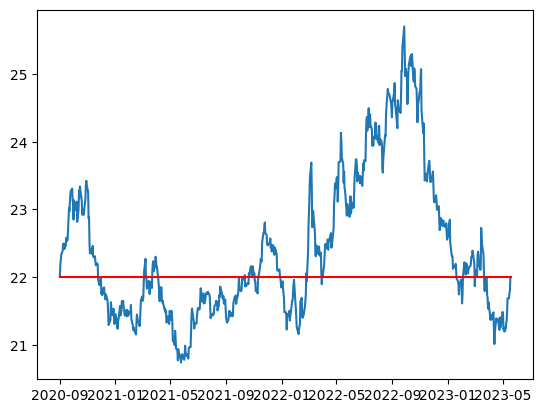

In [34]:
import matplotlib.pyplot as plt

import pandas as pd

TestData["Date"] = pd.to_datetime(TestData["Date"])

plt.plot(TestData["Date"], TestData["Price"])
plt.plot(TestData["Date"], Predictions, color='red')
plt.show()